In [2]:
import numpy as np
import random
from tqdm import tqdm 

In [3]:
num_s=7
states=[0,1,2,3,4,5,6]
s0=3
s_ter=[0,6]
r=[0]*7
r[6]=1

In [27]:
def gen_episode_MC():
  episodes=[]
  cur_s=s0
  proceeds=[-1,1]
  while cur_s not in s_ter:
    episodes.append(cur_s)
    ch=random.randint(0,1)
    proceed=proceeds[ch]
    cur_s+=proceed
  episodes.append(cur_s)
  if cur_s==6:
    r=1
  else:
    r=0
  return episodes,r

In [41]:
def TD(a,v):
  alpha=a
  cur_s=s0
  next_s=s0
  proceeds=[-1,1]
  while cur_s not in s_ter:
    ch=random.randint(0,1)
    proceed=proceeds[ch]
    next_s=cur_s+proceed
    # print(v)
    # print(r)
    v[cur_s]=v[cur_s]+alpha*(r[next_s]+v[next_s]-v[cur_s])
    cur_s=next_s
  return v

In [29]:
def MC(alpha,v):
  episode,returns=gen_episode_MC()
  for i in episode:
    s=i
    v[s]+=alpha*(returns-v[s])
  return v

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.6, 0.5]
[0.5, 0.5002723095371383, 0.502934254884083, 0.5129940293908807, 0.5808404229028905, 0.7977583712062729, 0.5]
[0.5, 0.5883028135863609, 0.7195395043095121, 0.9801591837960367, 1.154907739954357, 1.2964103056195448, 0.5]


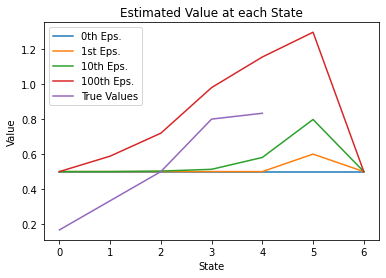

In [18]:
from matplotlib import pyplot as plt
v_ep=[]
v=[0.5]*7
fig = plt.figure()
true_v=np.array([0,1/6,2/6,3/6,4/6,5/6,1])
for eps in range(0,100):
  if eps in [0,1,10,100]:
    print(v)
    plt.plot(v)
  v=TD(v,0.1)
print(v)
plt.plot(v)
plt.plot([1/6, 2/6, 3/6, 4/5, 5/6]) # True values
plt.xlabel("State")
plt.ylabel("Value")
plt.title("Estimated Value at each State")
plt.legend(['0th Eps.', '1st Eps.', '10th Eps.', '100th Eps.', 'True Values'])
plt.show()

In [42]:
MC_a=[0.01,0.02,0.03,0.04]
TD_a=[0.05,0.1,0.15]
rms_MC=np.zeros((4,100))
rms_TD=np.zeros((4,100))
v_MC=[0.5]*7
v_TD=[0.5]*7
for i in range(100): 
  for eps in range(100):
    j=0
    for a in MC_a:
      v_MC=np.array(MC(a,v_MC))
      err=np.sqrt(np.power(v_MC-true_v,2))
      rms_MC[j][eps]=np.sum(err[1:6])/5
      j+=1
    j=0
    for a in TD_a:
      # print(v_TD)
      v_TD=np.array(TD(a,v_TD))
      err=np.sqrt(np.power(v_TD-true_v,2))
      rms_TD[j][eps]=np.sum(err[1:6])/5
      j+=1

In [46]:
# print(rms_MC)
# for a in rms_MC:
#   print(rms_MC[a])
#   rms_MC[a]/=100
# for a in rms_TD:
#   rms_TD[a]/=100

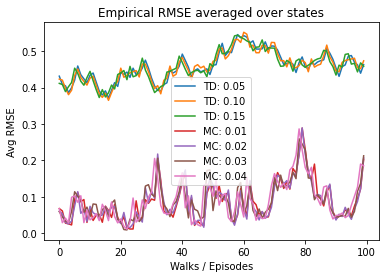

In [48]:
fig = plt.figure()
for i in range(len(TD_a)):
    plt.plot(rms_TD[i], label='TD: %.02f' % TD_a[i])
for i in range(len(MC_a)):
    plt.plot(rms_MC[i], label='MC: %.02f' % MC_a[i])
plt.xlabel('Walks / Episodes')
plt.ylabel('Avg RMSE')
plt.title("Empirical RMSE averaged over states")
plt.legend()
plt.show()